# CLINICAL DATASET

### Importing Libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,precision_score,accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### import the phenotype dataset

cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [3]:
# there are missing values
# I know this from the using the dataset in the gene sequencing notebook
# drop missing values and irrelevant columns

cl = cl.dropna(axis=0)
cl = cl.drop(['_INTEGRATION', '_PATIENT', '_GENOMIC_ID_miller2005'], axis = 1)

cl

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,WT-like,p53-
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,MT-like,p53+
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,MT-like,p53+
5,X105B13,46,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR+,13.0,WT-like,p53-
6,X106B55,37,No,DeathFromCancer,7.0,ER+,G1,LN-,PgR+,60.0,WT-like,p53-
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,No,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,17.0,WT-like,p53-
246,X90A63,76,Yes,AliveOrCensored,3.0,ER+,G3,LN-,PgR-,26.0,MT-like,p53-
248,X96A21,63,No,DeathFromCancer,0.0,ER+,G2,LN+,PgR+,38.0,WT-like,p53-
249,X99A50,82,Yes,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,19.0,WT-like,p53+


In [4]:
# Label encode the categorical variable

from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

label = LabelEncoder()

cols = ["DLDAerror", "DSS", "ERstatus", "EistonHistologicGrade",
        "LymphNodeStatus", "PgRstatus", "p53DLDAclassResult", "p53mutant"]

# apply label on categorical feature columns
cl[cols] = cl[cols].apply(lambda col: label.fit_transform(col))    
cl

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,0,0,12.0,0,0,1,1,9.0,1,1
1,X101B88,40,0,0,12.0,1,2,1,1,12.0,0,0
2,X102B06,51,0,0,12.0,0,2,1,0,26.0,0,0
5,X105B13,46,0,0,12.0,0,0,1,0,13.0,1,1
6,X106B55,37,0,1,7.0,0,0,1,0,60.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,0,0,11.0,0,0,1,0,17.0,1,1
246,X90A63,76,1,0,3.0,0,2,1,1,26.0,0,1
248,X96A21,63,0,1,0.0,0,1,0,0,38.0,1,1
249,X99A50,82,1,0,11.0,0,0,1,0,19.0,1,0


In [5]:
# one-hot encode the nominal columns

cl_encoded = pd.get_dummies(cl, columns= ["DLDAerror", "DSS", 
                                          "ERstatus", "EistonHistologicGrade",
                                          "LymphNodeStatus", "PgRstatus",
                                          "p53DLDAclassResult", "p53mutant"],
                            drop_first=True)
cl_encoded.shape

(222, 13)

In [6]:
## Add another column for High and low risk based on survival time

cl_encoded["risk"] = np.where(cl_encoded["DSS.time"]>=8.0, 0, 1)
cl_encoded

,sampleID,AgeAtDiagnosis,DSS.time,TumorSize,DLDAerror_1,DSS_1,ERstatus_1,EistonHistologicGrade_1,EistonHistologicGrade_2,LymphNodeStatus_1,PgRstatus_1,p53DLDAclassResult_1,p53mutant_1,risk
0,X100B08,68,12.0,9.0,0,0,0,0,0,1,1,1,1,0
1,X101B88,40,12.0,12.0,0,0,1,0,1,1,1,0,0,0
2,X102B06,51,12.0,26.0,0,0,0,0,1,1,0,0,0,0
5,X105B13,46,12.0,13.0,0,0,0,0,0,1,0,1,1,0
6,X106B55,37,7.0,60.0,0,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,11.0,17.0,0,0,0,0,0,1,0,1,1,0
246,X90A63,76,3.0,26.0,1,0,0,0,1,1,1,0,1,1
248,X96A21,63,0.0,38.0,0,1,0,1,0,0,0,1,1,1
249,X99A50,82,11.0,19.0,1,0,0,0,0,1,0,1,0,0


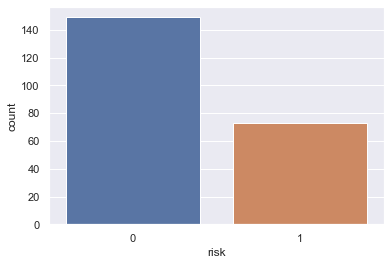

In [7]:
# check the distribution in target variable
# more low risk patients than high risk

sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl_encoded.risk)

## SPLITTING INTO TRAIN AND TEST SETS

In [8]:
## took survival time out of the features 
## because it gives the same relevant information as risk

X = cl_encoded.drop(["sampleID", "risk", "DSS.time"], axis=1)
y = cl_encoded["risk"]

# 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
scale = StandardScaler()

## Pipelines

In [9]:
from sklearn.pipeline import Pipeline

## baseline models

knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)
svc_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True))
    ]
)
grad_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('grad', GradientBoostingClassifier())
    ]
)

In [10]:
# list  and dictionary of pipelines for easy reference

pipelines = [knn_pipe, svc_pipe,grad_pipe]
pipe_dict = {0: 'KNN', 1:'SVC', 2:'Gradient'}

In [11]:
## fit models

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{} Accuracy: {:.3f}".format(pipe_dict[i],model.score(X_test,y_test)))

KNN Accuracy: 0.806
SVC Accuracy: 0.836
Gradient Accuracy: 0.806


# feature importance

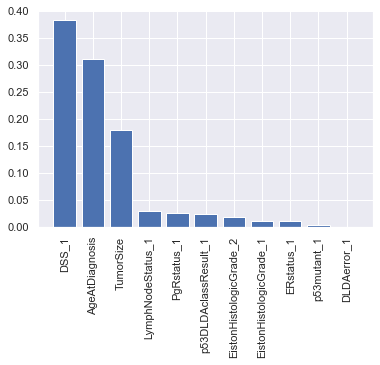

In [12]:
## plot feature importance

feature_names = X.columns
feature_importances = pipelines[2][1].feature_importances_
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

labels = np.array(feature_names)[sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

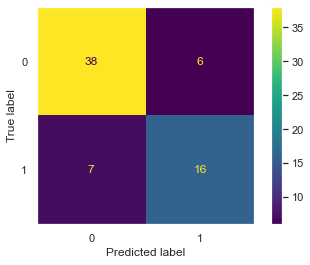

In [13]:
# check confusion matrix of best accuracy
plot_confusion_matrix(pipelines[2], X_test, y_test, display_labels=["0", "1"])
plt.show
plt.grid(False)

# LDA

In [14]:
## Apply LDA to all models

## LDA with models

knn1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('knn', KNeighborsClassifier())
    ]
)
svc1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('svc', SVC(probability=True))
    ]
)
grad1_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('grad', GradientBoostingClassifier())
    ]
)

In [15]:
# list  and dictionary of pipelines for easy reference

pipelines1 = [knn1_pipe, svc1_pipe,grad1_pipe]
pipe_dict1 = {0: 'KNN', 1:'SVC', 2:'Gradient'}

In [16]:
## fit models

for pipe1 in pipelines1:
    pipe1.fit(X_train, y_train)
    
for i, model1 in enumerate(pipelines1):
    print("{} Accuracy: {:.3f}".format(pipe_dict1[i],model1.score(X_test,y_test)))

KNN Accuracy: 0.866
SVC Accuracy: 0.866
Gradient Accuracy: 0.851


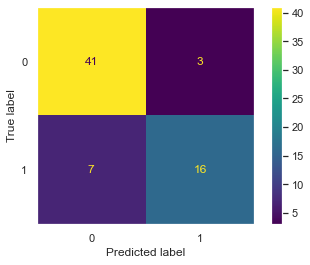

In [17]:
plot_confusion_matrix(pipelines1[2], X_test, y_test, display_labels=["0", "1"])
plt.show
plt.grid(False)

# Roc_Auc (baseline)

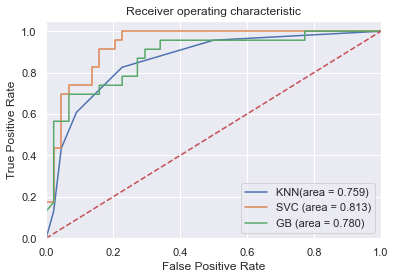

In [18]:
knn_pred = pipelines[0].predict(X_test)
svc_pred = pipelines[1].predict(X_test)
grad_pred = pipelines[2].predict(X_test)

knn_roc_auc = roc_auc_score(y_test, knn_pred)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, pipelines[0].predict_proba(X_test)[:,1])
svc_roc_auc = roc_auc_score(y_test, svc_pred)
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, pipelines[1].predict_proba(X_test)[:,1])
grad_roc_auc = roc_auc_score(y_test, grad_pred)
grad_fpr, grad_tpr, thresholds = roc_curve(y_test, pipelines[2].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN(area = %0.3f)' % knn_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (area = %0.3f)' % svc_roc_auc)
plt.plot(grad_fpr, grad_tpr, label='GB (area = %0.3f)' % grad_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Roc_Auc (LDA)

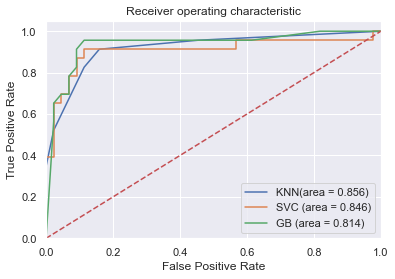

In [19]:
k2_pred = pipelines1[0].predict(X_test)
s2_pred = pipelines1[1].predict(X_test)
g2_pred = pipelines1[2].predict(X_test)

k2_roc_auc = roc_auc_score(y_test, k2_pred)
k2_fpr, k2_tpr, thresholds = roc_curve(y_test, pipelines1[0].predict_proba(X_test)[:,1])
s2_roc_auc = roc_auc_score(y_test, s2_pred)
s2_fpr, s2_tpr, thresholds = roc_curve(y_test, pipelines1[1].predict_proba(X_test)[:,1])
g2_roc_auc = roc_auc_score(y_test, g2_pred)
g2_fpr, g2_tpr, thresholds = roc_curve(y_test, pipelines1[2].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(k2_fpr, k2_tpr, label='KNN(area = %0.3f)' % k2_roc_auc)
plt.plot(s2_fpr, s2_tpr, label='SVC (area = %0.3f)' % s2_roc_auc)
plt.plot(g2_fpr, g2_tpr, label='GB (area = %0.3f)' % g2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()